### Importar os plugins necessários (numpy, matplotlib, pandas, seaborn)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Criar DataFrame usando o CSV

In [2]:
df = pd.DataFrame(pd.read_csv("movies_clean_python.csv"))

### Usar info() para ter uma ideia geral do CSV
Base de dados possui:
- 5421 entries;
- 15 colunas;
- 08 variáveis qualitativas utilizáveis (name, rating, genre, director, writer, star, country, company);
- 06 variáveis quantitativas utilizáveis (year, score, votes, budget, gross, runtime);
- Variável "released" será ignorada.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 635.4+ KB


### Análise Coluna NAME
- Ao usar value_counts(), é possível ver que alguns nomes se repetem;
- Lembrei que vi uma análise que usava wordcloud e implementei. Acredito que essa seja a única análise interessante pra essa coluna. Essa imagem mostra as 50 palavras que mais aparecem na coluna "name".

In [4]:
df.name.value_counts().head(10)

name
Hercules           3
The Thing          2
Godzilla           2
Crash              2
Fever Pitch        2
Under Suspicion    2
Nobody's Fool      2
Safe               2
The Postman        2
Neighbors          2
Name: count, dtype: int64

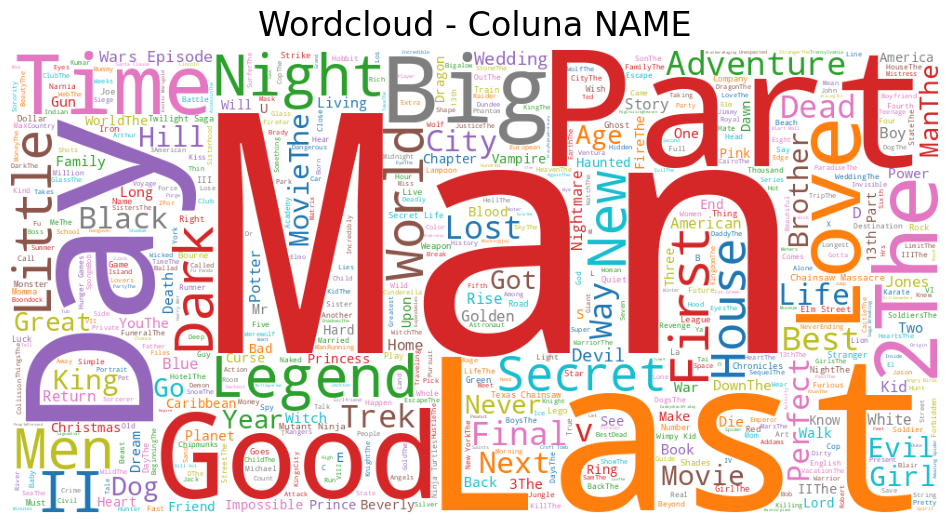

In [5]:
plt.figure(figsize=(12,8))
name_wc = WordCloud(
                    width=1000,
                    height=500,
                    max_words=1000,
                    background_color="white",
                    colormap=('tab10')
                    ).generate(''.join(df.name))
font = {##'weight': 'bold',
        'size': 24,
        }
plt.title('Wordcloud - Coluna NAME', fontdict=font, pad=10)
plt.imshow(name_wc)
plt.axis('off')
plt.show()

### Análise Coluna RATING

In [6]:
rating_count = df.rating.value_counts()
print(rating_count)

rating
R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: count, dtype: int64


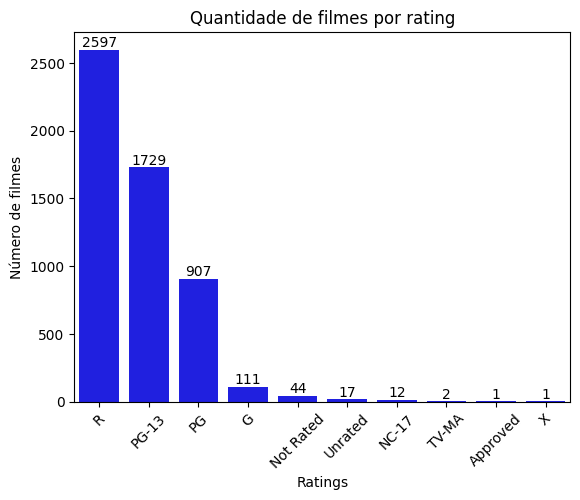

In [7]:
ax = sns.barplot(data=rating_count, color='blue')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Ratings')
plt.ylabel('Número de filmes')
plt.title('Quantidade de filmes por rating')
plt.xticks(rotation=45)
plt.show()

### Análise Coluna GENRE

In [8]:
genre_count = df.genre.value_counts()

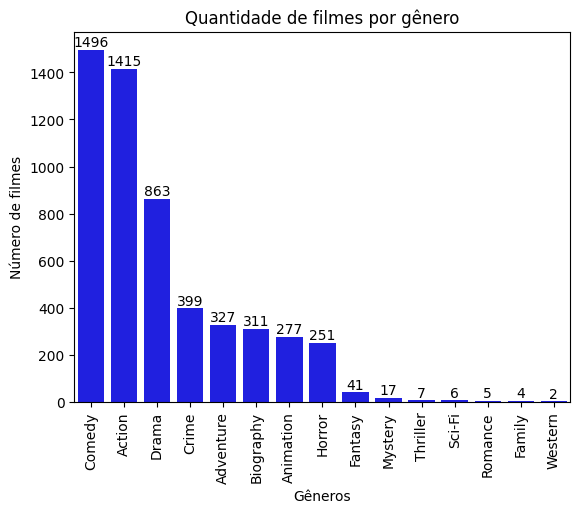

In [9]:
ax = sns.barplot(data=genre_count, color='blue')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Gêneros')
plt.ylabel('Número de filmes')
plt.title('Quantidade de filmes por gênero')
plt.xticks(rotation=90)
plt.show()

### Análise Coluna DIRECTOR (TOP 10)

In [10]:
director_count = df.director.value_counts().head(10)

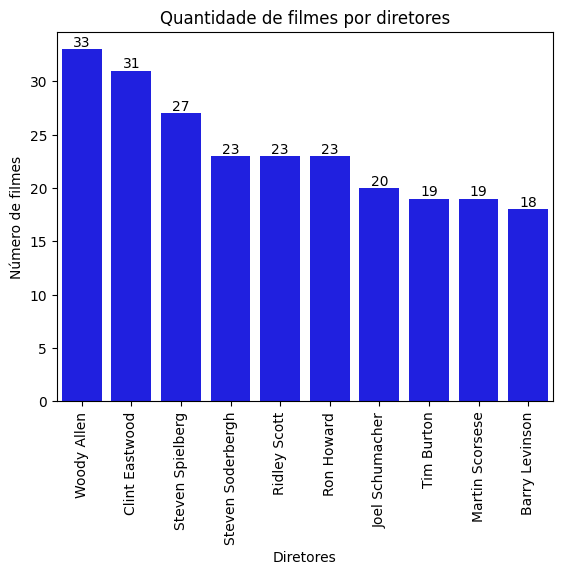

In [11]:
ax = sns.barplot(data=director_count, color='blue')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Diretores')
plt.ylabel('Número de filmes')
plt.title('Quantidade de filmes por diretores')
plt.xticks(rotation=90)
plt.show()

### Análise Coluna WRITER (TOP 10)

In [12]:
writer_count = df.writer.value_counts().head(10)

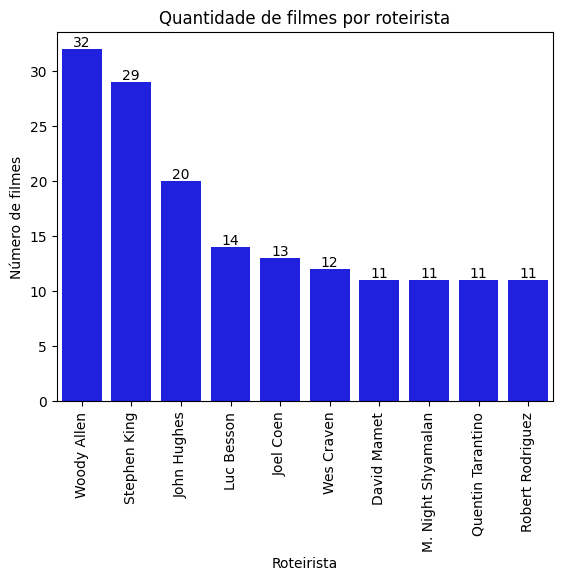

In [13]:
ax = sns.barplot(data=writer_count, color='blue')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Roteirista')
plt.ylabel('Número de filmes')
plt.title('Quantidade de filmes por roteirista')
plt.xticks(rotation=90)
plt.show()

### Análise Coluna STAR (TOP 10)

In [14]:
star_count = df.star.value_counts().head(10)

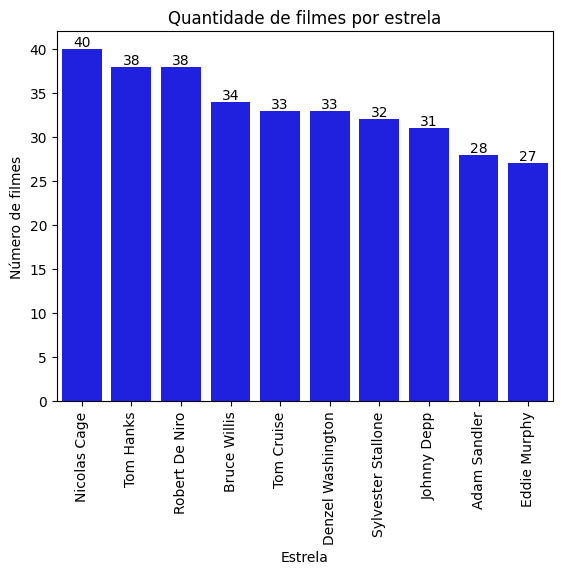

In [15]:
ax = sns.barplot(data=star_count, color='blue')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Estrela')
plt.ylabel('Número de filmes')
plt.title('Quantidade de filmes por estrela')
plt.xticks(rotation=90)
plt.show()

### Análise Coluna COUNTRY (TOP 10)

In [16]:
country_count = df.country.value_counts().head(10)

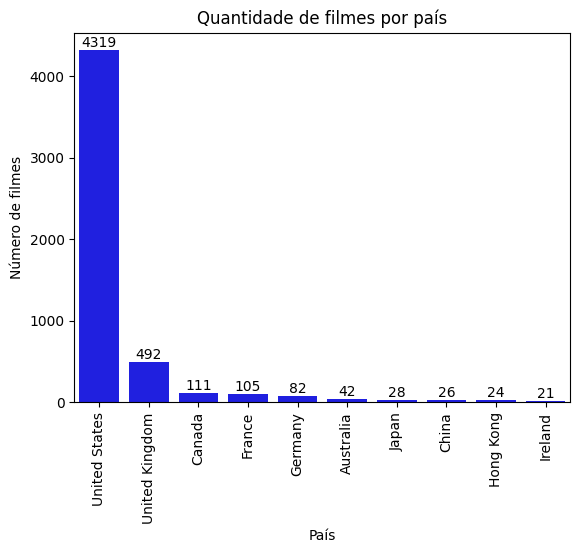

In [17]:
ax = sns.barplot(data=country_count, color='blue')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('País')
plt.ylabel('Número de filmes')
plt.title('Quantidade de filmes por país')
plt.xticks(rotation=90)
plt.show()

### Análise Coluna COMPANY (TOP 10)

In [18]:
company_count = df.company.value_counts().head(10)

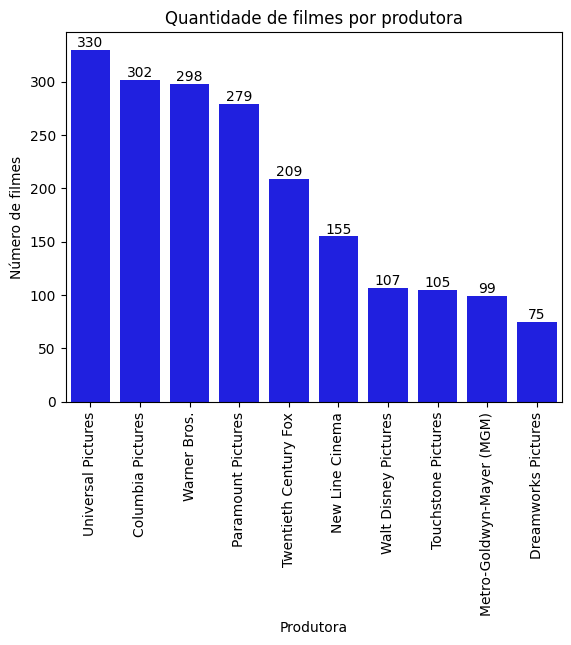

In [19]:
ax = sns.barplot(data=company_count, color='blue')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Produtora')
plt.ylabel('Número de filmes')
plt.title('Quantidade de filmes por produtora')
plt.xticks(rotation=90)
plt.show()

### Análise Coluna ANO

In [24]:
year_count = df.year.value_counts()
print(year_count)

year
2002    173
2009    171
2008    171
2005    170
2001    164
2010    164
2014    163
2006    163
2000    162
2012    162
1999    162
2013    161
2011    160
2003    159
2016    158
2004    158
2007    157
2015    156
1997    149
1998    148
1996    144
2018    143
1993    140
1995    138
2017    133
1992    131
1988    130
1994    128
1989    115
2019    113
1991    113
1990    111
1987    104
1986     99
1985     95
1984     88
1983     83
1982     71
1981     63
1980     40
2020      8
Name: count, dtype: int64


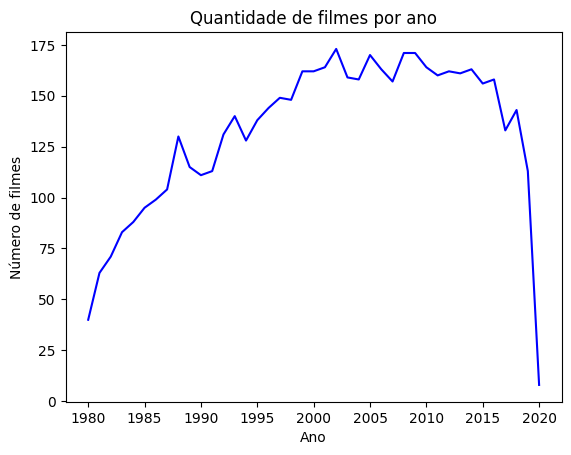

In [39]:
ax = sns.lineplot(data=year_count, color='blue',)

plt.xlabel('Ano')
plt.ylabel('Número de filmes')
plt.title('Quantidade de filmes por ano')
#plt.xticks(rotation=90)
plt.show()